# Heart Attack Analysis and Prediction

Dataset provided from https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

**Disclaimer**, the analysis and founding on this notebook is only applicable in the dataset, it might not be reflective to real world situations.


## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from scipy import stats as st
from scipy.stats import skew
from sklearn.model_selection import train_test_split

## 2. Data Understanding

In [2]:
# Importing dataset
df = pd.read_csv("~/Desktop\Dataset\Heart Failure\heart.csv")

In [3]:
# Showing the first ten rows of the dataset
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


*age* - Age of the patient

*sex* - Sex of the patient

*cp* - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

*trtbps* - Resting blood pressure (in mm Hg)

*chol* - Cholestoral in mg/dl fetched via BMI sensor

*fbs* - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False

*restecg* - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

*thalachh* - Maximum heart rate achieved

*oldpeak* - ST depression induced by exercise relative to rest

*slp* - the slope of the peak exercise ST segment (0 = upsloping; 1 = flat; 2 = downsloping)

*caa* - Number of major vessels (0-3) colored by flourosopy

*thall* - Thalium Stress Test result ~ (0,3)

*exng* - Exercise induced angina ~ 1 = No, 0 = Yes

*output* - Target variable

In [4]:
# Checking null values
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

There's no null values, therefore nothing had to be done.

In [5]:
# Checking duplicate values
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [6]:
# Delete duplicate values
df = df.drop_duplicates()

In [7]:
# Dataset shape
print('There are', df.shape[0], 'rows and',df.shape[1],'columns.')

There are 302 rows and 14 columns.


In [8]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [9]:
# Splitting columns into categorical, numerical and target columns
cat_cols = ['sex','cp','fbs','restecg','exng','slp','caa','thall']
num_cols = ['age','trtbps','chol','thalachh','oldpeak']
target_col = ['output']

In [10]:
print("The categorial columns are : ", cat_cols)
print("The numerical columns are : ", num_cols)
print("The target variable is :  ", target_col)

The categorial columns are :  ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
The numerical columns are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :   ['output']


In [11]:
# Summary of numerical columns
df[num_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
trtbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
thalachh,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


## 3. Data Visualization and Analytics
### Correlation Matrix

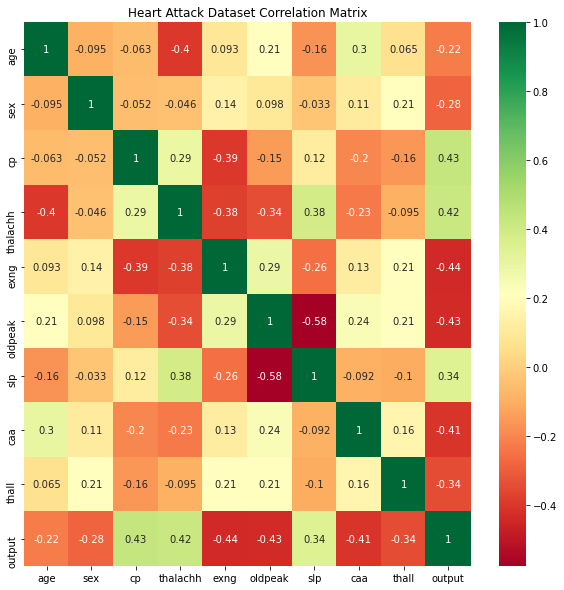

In [12]:
# Finding correlated attributes
corr_matrix = df.corr()
top_corr_var = corr_matrix.index[abs(corr_matrix['output'])>0.2]

# Plotting the matrix
plt.figure(figsize=(10,10))
plt.title("Heart Attack Dataset Correlation Matrix")
graph = sns.heatmap(df[top_corr_var].corr(), annot=True, cmap="RdYlGn")

The correlation matrix above is set so  the rows that scored more than 0.2 or less than -0.2 would be shown, that means that the matrix only show influential rows towards the output.

The higher the row's score, means that the higher value would result to a positive output (1). The lower the row's score, means the higher value would result to a negative output (0).

From the correlation matrix we learnt that=
* Rows with relatively high positive correlation scores are
    * cp
    * thalachh
    * slp
* Rows with relatively high negative correlation scores are
    * age
    * sex
    * exng
    * oldpeak
    * caa
    * thall
    
There are other unmentioned variables such as *trtbps* and *chol*, its because it doesn't show high correlation values in the dataset.

### 3.1. Output Variable
*output* - Target Variable (1 = had heart attack, 0 = no heart attack)

Number of people that have heart attack 164 and number of people that dont have heart attack 138


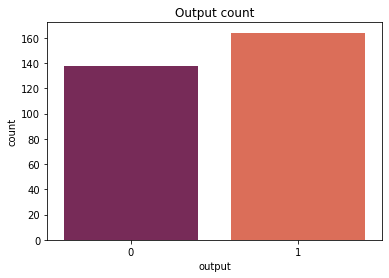

In [13]:
# Showing count of output
print('Number of people that have heart attack', len(df[df.output==1]), 'and number of people that dont have heart attack', len(df[df.output==0]))
sns.countplot(x='output', data=df, palette='rocket')
plt.title("Output count")
plt.show()

### 3.2. Age Variable
*age* - Age of the patient

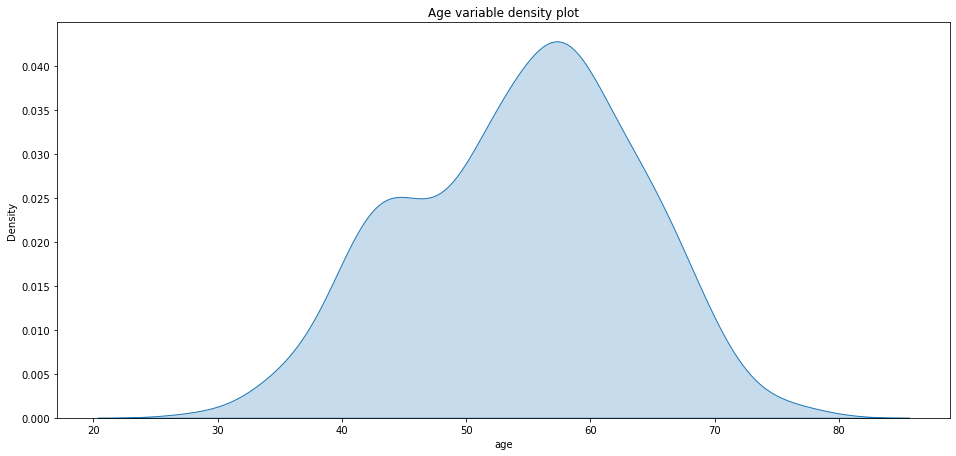

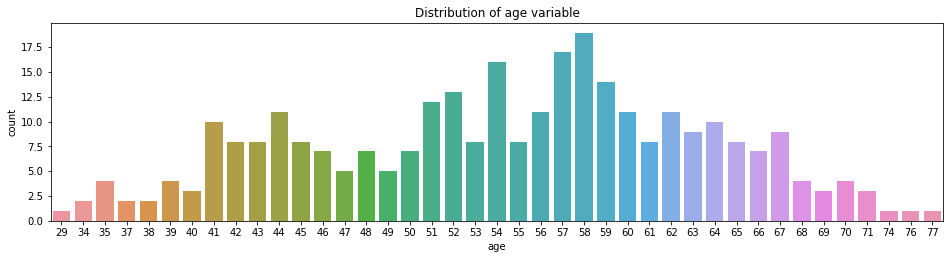

In [14]:
# Plotting the density of age variable
fig = plt.figure(figsize=(16, 16))
fig = plt.subplot(211)
sns.kdeplot(df['age'],shade=True,label=' Age')
plt.title("Age variable density plot")

# Distribution graph of age variable
fig = plt.figure(figsize=(16, 8))
fig = plt.subplot(212)
agecount =(df.age.value_counts())
sns.countplot(x='age', data=df)
plt.title("Distribution of age variable")
plt.show()

From this table, we can see that mostly the people in the dataset are between their late 40s to 60s.

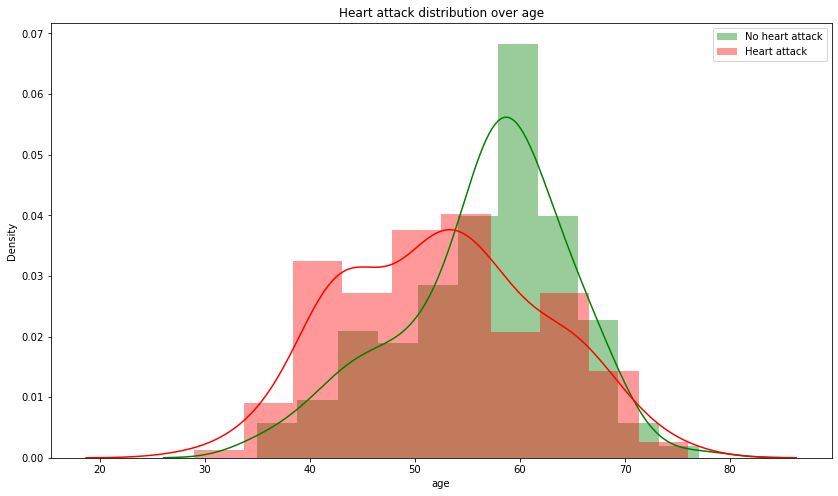

In [15]:
# Density graph of age over output
fig = plt.figure(figsize=(14,8))
sns.distplot(df[df['output']==0]["age"], color='green', label='No heart attack')
sns.distplot(df[df['output']==1]["age"], color='red', label='Heart attack')
plt.title('Heart attack distribution over age')
plt.legend()

However, as seen in density plot above, there is little correlation between age and output variable. It can be seen that in the dataset people between early 40s to late 50s are more vulnerable to heart attack. But other than that, we can see small correlation between age and heart attack. It proofs the correlation matrix's score.

### 3.3. Sex Variable
*sex* - Sex of the patient

Text(0.5, 1.0, 'Age variable')

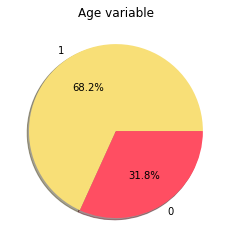

In [16]:
sexcount = pd.DataFrame(df['sex'].value_counts().reset_index())
# Creating sex variable pie chart
plt.pie(data = sexcount,
        x = 'sex',
        shadow= True,
        colors = ['#F8DF77', '#FF4E62'],
        labels = 'index', 
        autopct = '%.1f%%')
plt.title("Age variable")

There are twice as many 1 compared to 0 in this dataset. It is unknown which one is man and woman.

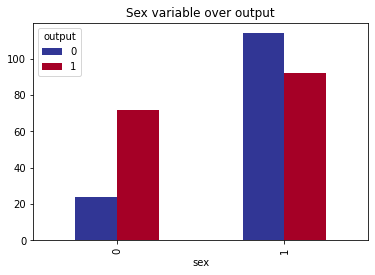

In [17]:
# Bar graph of sex and output variables
pd.crosstab(df.sex, df.output).plot(kind='bar', colormap='RdYlBu_r')
plt.title('Sex variable over output')
plt.show()

Based on bar chart above, it can be concluded that if the sex value is 0, the chance of having heart attack is higher compared to sex value 1.

In [18]:
# Likelihood ratio table
df2 = pd.crosstab(df.sex, df.output)
df2['Likelihood Ratio'] = df2[1]/df2[0]
df2.head(5)

output,0,1,Likelihood Ratio
sex,,,
0,24,72,3.000000
1,114,92,0.807018


##### Likelihood Ratio

Likelihood Ratio = probability a person with the condition has a certain test result/probability a person without the condition has a certain test result

Interpreting Likelihood Ratios
Likelihood ratios range from zero to infinity. The higher the value, the more likely the patient has the condition. As an example, let’s say a positive test result has an LR of 9.2. This result is 9.2 times more likely to happen in a patient with the condition than it would in a patient without the condition.

A rule of thumb (McGee, 2002; Sloane, 2008) for interpreting them:

* 0 to 1: decreased evidence for disease. Values closer to zero have a higher decrease in probability of disease. For example, a LR of 0.1 decreases probability by -45%, while a value of -0.5 decreases probability by -15%.
* 1: no diagnostic value.
* Above 1: increased evidence for disease. The farther away from 1, the more chance of disease. For example, a LR of 2 increases the probability by 15%, while a LR of 10 increases the probability by 45%. An LR over 10 is very strong evidence to rule in a disease.

And from the table above, the likelihood ratio of having a heart attack is relatively higher when your sex value is 0. However this is only limited to 302 cases in the dataset, and might not reflective of real world conditions.

### 3.4. Chest Pain Variable
*cp* - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

0    143
2     86
1     50
3     23
Name: cp, dtype: int64


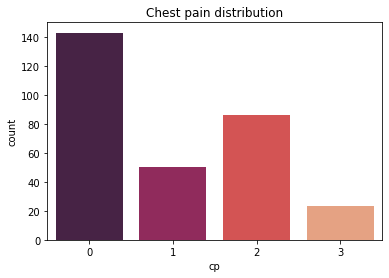

In [19]:
# Showing number of chest pains in the dataset
cp=(df.cp.value_counts())
print(cp)
sns.countplot(x="cp", data=df, palette="rocket")
plt.title("Chest pain distribution")
plt.show()

Based on the chart above, it can be concluded that
1. The highest type of chest pain is typical angina (0)
2. The lowest type is asymptomatic (3)

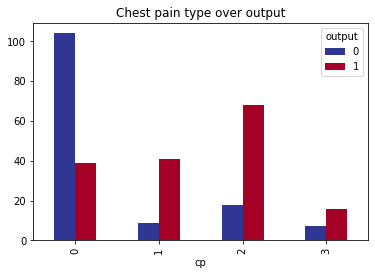

Text(0.5, 1.0, 'Chest pain type over output')

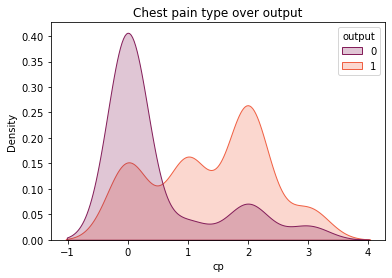

In [20]:
# Bar chart of sex and output
pd.crosstab(df.cp, df.output).plot(kind='bar', colormap='RdYlBu_r')
plt.title('Chest pain type over output')
plt.show()
# Density plot of sex and output
sns.kdeplot(data=df, x='cp', hue='output', fill=True, palette='rocket')
plt.title('Chest pain type over output')

In [21]:
# Likelihood ratio table
df2 = pd.crosstab(df.cp, df.output)
df2['Likelihood Ratio'] = df2[1]/df2[0]
df2.head(5)

output,0,1,Likelihood Ratio
cp,,,
0,104,39,0.375000
1,9,41,4.555556
2,18,68,3.777778
3,7,16,2.285714


Based on the chart and table above, we can conclude a couple of things.
1. The chance of having a heart attack is considerably low if you have typical angina. 104 people that have it and doesn't have heart attack, while 39 experience heart attack (chest pain type 0).
2. The chance of having a heart attack is really high if you have atypical angina. Out of 50 people with atypical angina, only 9 people don't have a heart attack (chest pain type 1).
3. The chance of having a heart attack is high if you have either non-anginal pain or asymptomatic (chest pain type 2 and 3).

### 3.5. thalachh Variable
*thalachh* - Maximum heart rate achieved

Text(0.5, 1.0, 'Maximum heart rate density')

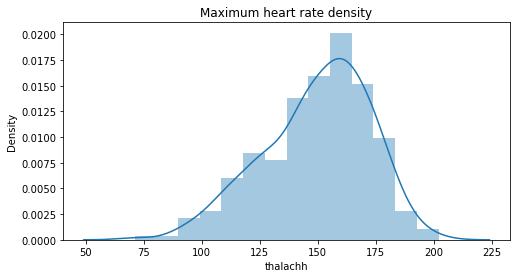

In [22]:
# Plotting density graph of thalachh variable
fig = plt.figure(figsize=(8,4))
sns.distplot(df['thalachh'], kde=True)
plt.title('Maximum heart rate density')

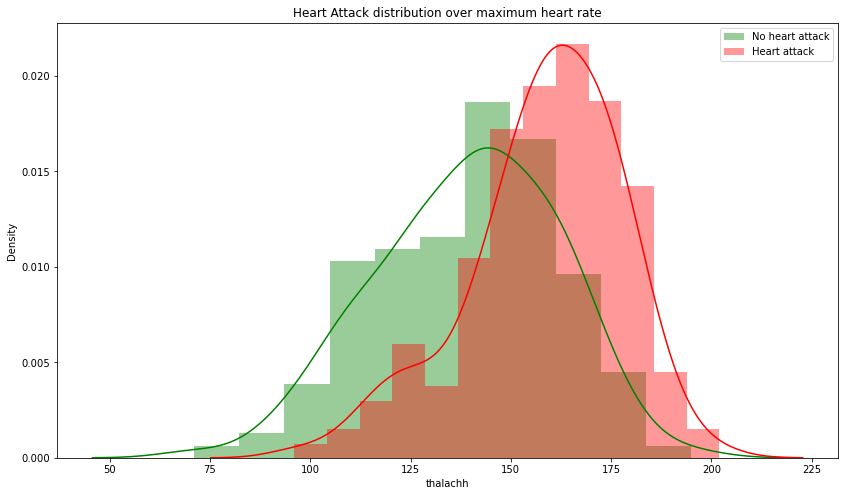

In [23]:
# Density graph of thalachh over output
fig = plt.figure(figsize=(14,8))
sns.distplot(df[df['output']==0]["thalachh"], color='green', label='No heart attack')
sns.distplot(df[df['output']==1]["thalachh"], color='red', label='Heart attack')
plt.title('Heart Attack distribution over maximum heart rate')
plt.legend()

As seen from the density graph above, it can be concluded that the higher your maximum heart rate, the more susceptible you are on heart attack.

When the maximum heart rate is 140 or above, the risk of getting heart attack is increased significantly.

### 3.6. Relationship between chest pain, thalachh, and output

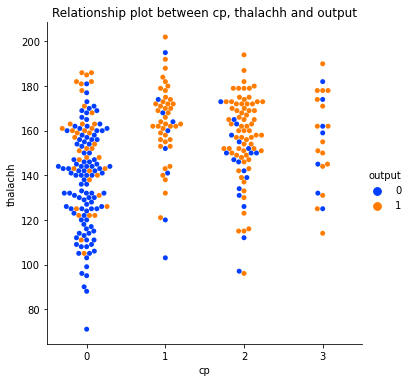

In [24]:
# Relationship plot of cp, thalachh, and output
sns.catplot(x='cp', 
            y='thalachh', 
            hue='output', 
            kind="swarm",
            palette="bright",
            data=df)
plt.title("Relationship plot between cp, thalachh and output")
plt.show()

The categorical relational plot above shows that if you have a lower maximum heart rate and if you have typical angina, then the chance of having heart attack is significantly lower compared to higher maximum heart rate and having other types of chest pain. (cp - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic, higher cp value don't mean higher intensity of chest pain.

### 3.7. exng variable
*exng* - Exercise induced angina ~ 0 = Yes, 1 = No

   index  exng
0      0   203
1      1    99


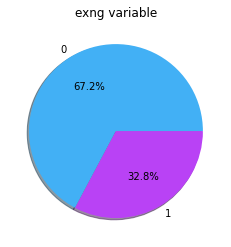

In [25]:
exngcount = pd.DataFrame(df['exng'].value_counts().reset_index())
print(exngcount)
# Creating exng variable pie chart
plt.pie(data = exngcount,
        x = 'exng',
        shadow= True,
        colors = ['#42b0f5', '#b942f5'],
        labels = 'index', 
        autopct = '%.1f%%')
plt.title("exng variable")
plt.show()

In the dataset theres 203 people that doent have angina after exercising, while 99 people does.

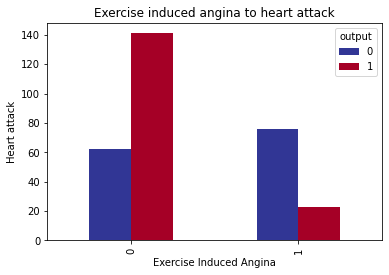

In [26]:
# Bar chart of exng and output
pd.crosstab(df.exng, df.output).plot(kind='bar',colormap='RdYlBu_r')
plt.title('Exercise induced angina to heart attack')
plt.xlabel('Exercise Induced Angina')
plt.ylabel('Heart attack')
plt.show()

The barchart portrays the frequency of heart disease by exercise induced angina. 

A little explanation, angina is a chest pain caused by reduced bloodflow to the chest and its one of cardiac disease symptoms.

As expected, most healthy people don't experience angina while exercising, and most people that experience angina would more likely have a form of heart disease.

And obviously, 'exang' variable have a moderate corellation with 'target', proved both with this graph and the correlation matrix (-0.44).

### 3.8. oldpeak variable
*oldpeak* - ST depression induced by exercise relative to rest

Text(0.5, 1.0, 'oldpeak density')

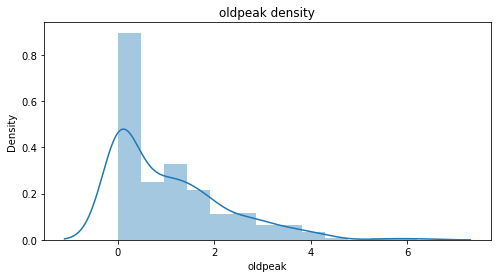

In [27]:
# Plotting density graph of oldpeak variable
fig = plt.figure(figsize=(8,4))
sns.distplot(df['oldpeak'], kde=True)
plt.title("oldpeak density")

oldpeak variable in the dataset is highly right skewed. Most of the value is around 0 and 2. It is highly unbalanced.

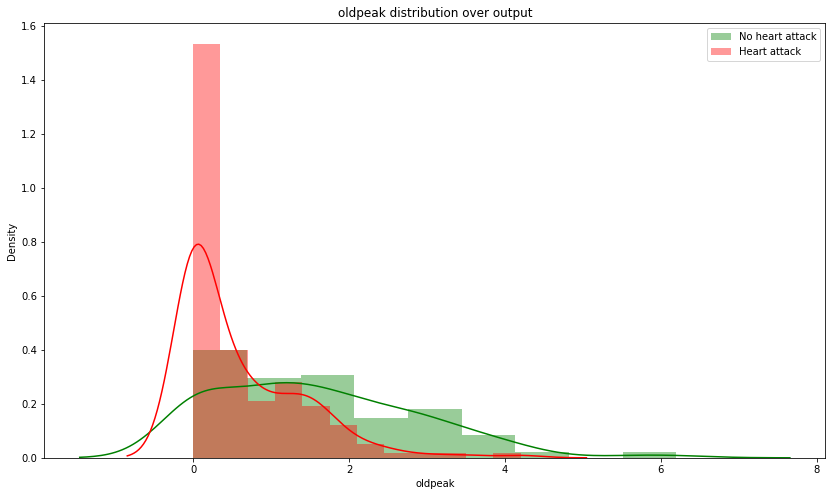

In [28]:
# Density graph of oldpeak over output
fig = plt.figure(figsize=(14,8))
sns.distplot(df[df['output']==0]["oldpeak"], color='green', label='No heart attack')
sns.distplot(df[df['output']==1]["oldpeak"], color='red', label='Heart attack')
plt.title('oldpeak distribution over output')
plt.legend()

From the graph above, the chance of having a heart attack is significantly higher when the oldpeak variable is really low (around 0 to 1).

### 3.9. slp variable
*slp* - the slope of the peak exercise ST segment (0 = upsloping; 1 = flat; 2 = downsloping)

2    141
1    140
0     21
Name: slp, dtype: int64


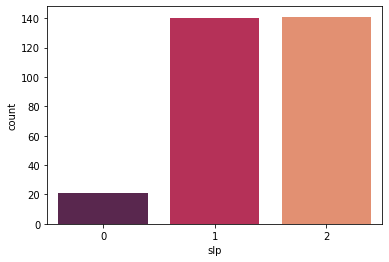

In [29]:
# Bar chart of slp
slpcount=(df.slp.value_counts())
print(slpcount)
sns.countplot(x="slp", data=df, palette='rocket')
plt.show()

Text(0.5, 1.0, 'slp variable over output')

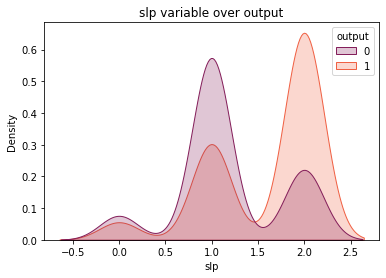

In [30]:
# Density graph of slp over output
sns.kdeplot(data=df, x='slp', hue='output', fill=True, palette='rocket')
plt.title('slp variable over output')

In [31]:
# Likelihood ratio table
df2 = pd.crosstab(df.slp, df.output)
df2['Likelihood Ratio'] = df2[1]/df2[0]
df2.head(5)

output,0,1,Likelihood Ratio
slp,,,
0,12,9,0.750000
1,91,49,0.538462
2,35,106,3.028571


Based on density graph and table above, we can rule out that if slp is 2, then the person have a relatively high risk of heart attack, on the other hand if the slp is 1, then the person would less likely to have heart attack. And there's lack of data to determine the risk of having heart attack if the slp is 0.

### 3.10. caa variable

 *caa* - Number of major vessels (0-3) colored by flourosopy

   index  caa
0      0  175
1      1   65
2      2   38
3      3   20
4      4    4


<AxesSubplot:xlabel='caa', ylabel='count'>

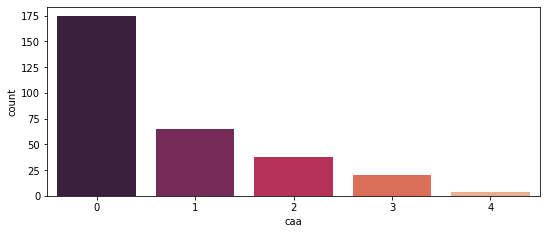

In [32]:
# Bar chart of caa variable
caacount=(df.caa.value_counts().reset_index())
print(caacount)
fig = plt.figure(figsize=(30, 16))
fig = plt.subplot(431)
sns.countplot(x="caa", data=df, palette='rocket')

Text(0.5, 1.0, 'caa variable over output')

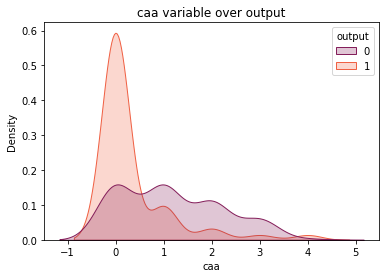

In [33]:
# Density graph of caa over output
sns.kdeplot(data=df, x='caa', hue='output', fill=True, palette='rocket')
plt.title('caa variable over output')

In [34]:
# Likelihood ratio table
df2 = pd.crosstab(df.caa, df.output)
df2['Likelihood Ratio'] = df2[1]/df2[0]
df2.head(5)

output,0,1,Likelihood Ratio
caa,,,
0,45,130,2.888889
1,44,21,0.477273
2,31,7,0.225806
3,17,3,0.176471
4,1,3,3.000000


Based on the graph and table above, people are more at risk of heart attack if their caa is 0. Other than that, the higher the caa, the lower risk of having a heart attack.

### 3.11. thall variable
*thall* - Thalium Stress Test result ~ (0,3)

   index  thall
0      2    165
1      3    117
2      1     18
3      0      2


<AxesSubplot:xlabel='thall', ylabel='count'>

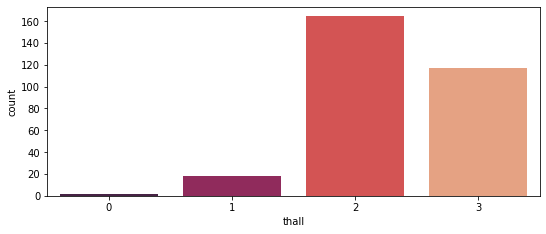

In [35]:
# Bar chart of thall variable
thallcount=(df.thall.value_counts().reset_index())
print(thallcount)
fig = plt.figure(figsize=(30, 16))
fig = plt.subplot(431)
sns.countplot(x='thall', data=df, palette='rocket')

Text(0.5, 1.0, 'Thall variable over output')

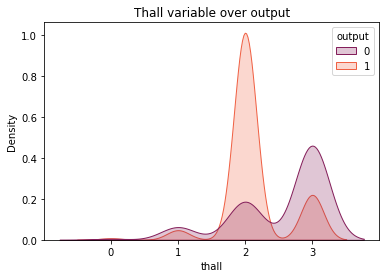

In [36]:
# Density graph of thall over output
sns.kdeplot(data=df, x='thall', hue='output', fill=True, palette='rocket')
plt.title('Thall variable over output')

In [37]:
# Likelihood ratio table
df2 = pd.crosstab(df.thall, df.output)
df2['Likelihood Ratio'] = df2[1]/df2[0]
df2.head(5)

output,0,1,Likelihood Ratio
thall,,,
0,1,1,1.000000
1,12,6,0.500000
2,36,129,3.583333
3,89,28,0.314607


Based on the graph, if the thall variable is 2, then it is more likely to have a heart attack.

### 3.12. Key Takeaway from EDA

According to the data exploration and visualisation, it can be concluded that=
1.	There are 14 variables in total in the dataset, 13 without the output variable.
2.	There are 8 categorical variables, and 5 numerical variables.
3.	Based on the correlation matrix,
* Rows with relatively high positive correlation scores are
    * cp
    * thalachh
    * slp
* Rows with relatively high negative correlation scores are
    * age
    * sex
    * exng
    * oldpeak
    * caa
    * thall
4.	People between early 40s and late 50s are more likely to have a heart attack, while interestingly, people on their 60s to their late 60s is less likely to have a heart attack.
5.	People with sex value 0 is more likely to have a heart attack. (It is unknown whether 0 is male or female, the information is not provided)
6.	People with chest pain other than type 0 (Typical angina pain) is likely to have heart attack. However, people with chest pain type 2 (Non-anginal pain) are at highest risk to have heart attack. 
7.	People with higher maximum heart rate is more likely to have heart attack. On the other hand, the lower the maximum heart rate the safer it is from heart attack.
8.	People with chest pain type 2, and high maximum heart rate is at really high risk to have heart attack. However, people with chest pain type 0 and lower maximum heart rate are relatively safe. 
9.	People with exercise induced angina is more likely to have heart attack compared to those who does not.
10.	People with low oldpeak value around 0 to 1, have a significantly higher risk of heart attack. (Oldpeak variable is not properly explained)
11.	People with down sloping peak ST segment is highly likely to have a heart attack compared to people with flat peak ST segment.
12.	People with no major vessel is at an extremely high risk of heart attack, the more major vessel a person have, the lower the chance of having a heart attack.
13.	People with thallium stress test result of 2 is at higher risk of having heart attack compared to the other results.


## 4. Data Preprocessing

### 4.1. Dummy variables (encoding)

In [38]:
# Creating dummy packages (encoding)
df1 = df
df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)
df1.head(10)

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
5,57,140,192,148,0.4,1,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
6,56,140,294,153,1.3,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
7,44,120,263,173,0.0,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
8,52,172,199,162,0.5,1,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
9,57,150,168,174,1.6,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0


### 4.2. Transforming skewed data

In [39]:
# Calculating numerical variables skewness
for x in num_cols:
    print('Skewness of', x, skew(df[x]))

Skewness of age -0.20272991021357126
Skewness of trtbps 0.7129775303337107
Skewness of chol 1.1416258623729787
Skewness of thalachh -0.5300218699527914
Skewness of oldpeak 1.259875086599324


If skewness is less than -1 or greater than 1, the distribution is highly skewed.
If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

And based on the calculation, it can be concluded that age is symmetric, while trtbps and thalachh is moderately skewed and chol and oldpeak is highly skewed.

In [40]:
# Box cox transformation to reduce skewness
skew_num_cols = ['trtbps','chol','thalachh']
for x in skew_num_cols:
    bc_cols = st.boxcox(df[x])[0]
    df1[x] = bc_cols
    print('Skewness of', x, pd.Series(bc_cols).skew())
df1.head(5)

Skewness of trtbps -0.0008067848026506883
Skewness of chol -0.006025706195089309
Skewness of thalachh -0.07396071353148141


,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,1.371877,4.169241,31335.203756,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,1.368518,4.209223,51186.465416,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,1.368518,4.092979,42494.123889,1.4,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,1.365885,4.176526,45864.292451,0.8,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,1.365885,4.402503,37703.049070,0.6,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


<AxesSubplot:xlabel='thalachh', ylabel='Density'>

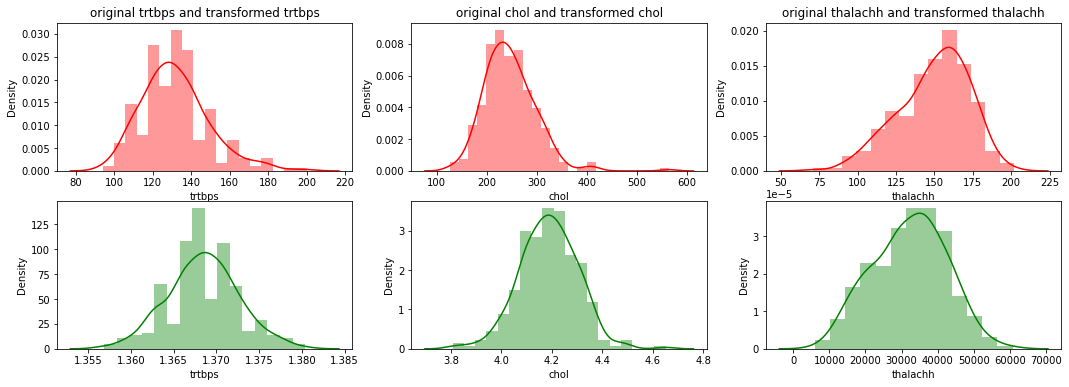

In [41]:
# Plotting comparison before and after boxcox transformation
fig=plt.figure(figsize=(18, 6))
fig = plt.subplot(2,3,1)
sns.distplot(df['trtbps'], color='red', label='trtbps')
plt.title("original trtbps and transformed trtbps")

fig = plt.subplot(2,3,4)
sns.distplot(df1['trtbps'], color='green', label='transformed trtbps')

fig = plt.subplot(2,3,2)
sns.distplot(df['chol'], color='red', label='chol')
plt.title("original chol and transformed chol")

fig = plt.subplot(2,3,5)
sns.distplot(df1['chol'], color='green', label='transformed chol')

fig = plt.subplot(2,3,3)
sns.distplot(df['thalachh'], color='red', label='thalachh')
plt.title("original thalachh and transformed thalachh")

fig = plt.subplot(2,3,6)
sns.distplot(df1['thalachh'], color='green', label='transformed thalachh')

In [42]:
# Boxcox transformation for oldpeak variable
bc_oldpeak= st.boxcox(df[x])[0]
df1['oldpeak'] = bc_oldpeak
df1['oldpeak'].skew()
df1.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,1.371877,4.169241,31335.203756,31335.203756,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,1.368518,4.209223,51186.465416,51186.465416,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,1.368518,4.092979,42494.123889,42494.123889,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,1.365885,4.176526,45864.292451,45864.292451,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,1.365885,4.402503,37703.049070,37703.049070,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [43]:
df1['oldpeak'].skew()

-0.07396071353148141

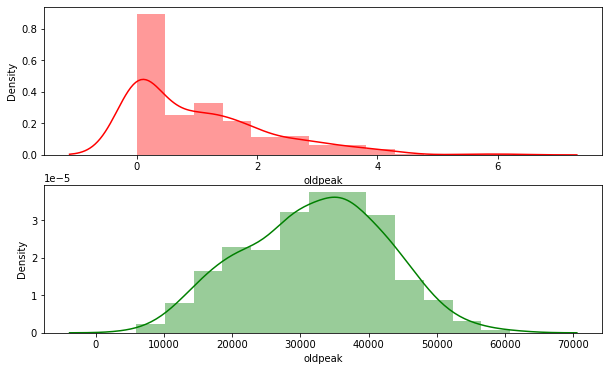

In [44]:
fig=plt.figure(figsize=(10,6))
fig = plt.subplot(2,1,1)
sns.distplot(df['oldpeak'], color='red', label='oldpeak')
fig = plt.subplot(2,1,2)
sns.distplot(df1['oldpeak'], color='green', label='transformed oldpeak')
plt.show()

In [45]:
#X = df1.drop(['output'], axis=1)
#y = df1['output']

X = df.drop(['output'], axis=1)
y = df['output']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print("The shape of X_train is", X_train.shape)
print("The shape of X_test is", X_test.shape)
print("The shape of y_train is", y_train.shape)
print("The shape of y_test is", y_test.shape)

The shape of X_train is (241, 13)
The shape of X_test is (61, 13)
The shape of y_train is (241,)
The shape of y_test is (61,)


## 5. Modelling

### 5.1. Logistic Regression

In [47]:
# Importing the package
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve

In [48]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

y_pred_proba = logmodel.predict_proba(X_test)

y_pred = np.argmax(y_pred_proba, axis = 1)

print(accuracy_score(y_test, y_pred))

0.8524590163934426


In [49]:
# instantiating the object
logreg = LogisticRegression()

# fitting the object
logreg.fit(X_train, y_train)

# calculating the probabilities
y_pred_proba = logreg.predict_proba(X_test)

# finding the predicted valued
y_pred = np.argmax(y_pred_proba,axis=1)

# printing the test accuracy
print("The test accuracy score of Logistric Regression is ", accuracy_score(y_test, y_pred))

The test accuracy score of Logistric Regression is  0.8524590163934426
